# Topic Modelling: _Documenting the American South_ 1734-1798

This JupyterNotebook was devised by DARIAH and can be retrieved from https://github.com/DARIAH-DE/Topics.

In [2]:
from pathlib import Path
import dariah
import cophi
from cophi_toolbox import preprocessing
import os
import metadata_toolbox.utils as metadata
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd

## Preprocessing the corpus

Setting the path:

In [3]:
directory = Path("data", "1734-1798-chunks")

Displaying the files in the folder:

In [4]:
sorted(os.listdir(path=directory))

['neh-bluett-bluett_0000.txt',
 'neh-equiano1-equiano1_0000.txt',
 'neh-equiano1-equiano1_0001.txt',
 'neh-equiano1-equiano1_0002.txt',
 'neh-equiano1-equiano1_0003.txt',
 'neh-equiano2-equiano2_0000.txt',
 'neh-equiano2-equiano2_0001.txt',
 'neh-equiano2-equiano2_0002.txt',
 'neh-equiano2-equiano2_0003.txt',
 'neh-gronniosaw-gronnios_0000.txt',
 'neh-gronniosaw-gronnios_0001.txt',
 'neh-johnstone-johnstone_0000.txt',
 'neh-johnstone-johnstone_0001.txt',
 'neh-mountain-mountain_0000.txt',
 'neh-norris-norris_0000.txt',
 'neh-norris-norris_0001.txt',
 'neh-norris-norris_0002.txt',
 'neh-norris-norris_0003.txt',
 'neh-royal-royal_0000.txt',
 'neh-royal-royal_0001.txt',
 'neh-sancho1-sancho1_0000.txt',
 'neh-sancho1-sancho1_0001.txt',
 'neh-sancho1-sancho1_0002.txt',
 'neh-sancho1-sancho1_0003.txt',
 'neh-sancho2-sancho2_0000.txt',
 'neh-sancho2-sancho2_0001.txt',
 'neh-sancho2-sancho2_0002.txt',
 'neh-sancho2-sancho2_0003.txt',
 'neh-venture-venture_0000.txt']

In [5]:
pattern = '{abbr}-{author}-{author2}_{chunk}'

Generates a table featuring the files' abbreviation, author, second mention of author, and chunk number:

In [8]:
meta = pd.concat([metadata.fname2metadata(str(path), pattern=pattern) for path in directory.glob('*.txt')])
meta[:10]

,abbr,author,author2,chunk
data\1734-1798-chunks\neh-bluett-bluett_0000.txt,neh,bluett,bluett,0000
data\1734-1798-chunks\neh-equiano1-equiano1_0000.txt,neh,equiano1,equiano1,0000
data\1734-1798-chunks\neh-equiano1-equiano1_0001.txt,neh,equiano1,equiano1,0001
data\1734-1798-chunks\neh-equiano1-equiano1_0002.txt,neh,equiano1,equiano1,0002
data\1734-1798-chunks\neh-equiano1-equiano1_0003.txt,neh,equiano1,equiano1,0003
data\1734-1798-chunks\neh-equiano2-equiano2_0000.txt,neh,equiano2,equiano2,0000
data\1734-1798-chunks\neh-equiano2-equiano2_0001.txt,neh,equiano2,equiano2,0001
data\1734-1798-chunks\neh-equiano2-equiano2_0002.txt,neh,equiano2,equiano2,0002
data\1734-1798-chunks\neh-equiano2-equiano2_0003.txt,neh,equiano2,equiano2,0003
data\1734-1798-chunks\neh-gronniosaw-gronnios_0000.txt,neh,gronniosaw,gronnios,0000


Read the documents and display the text of a sample file:

In [9]:
corpus = list(preprocessing.read_files(meta.index))
#corpus[1]

### Tokenising using cophi
(see https://github.com/cophi-wue/cophi-toolbox/blob/master/notebooks/introducing-cophi.ipynb):

In [10]:
corpus, metadata = cophi.corpus(directory,
                      lowercase=True,
                      token_pattern=r"\p{Letter}+\p{Connector_Punctuation}?\p{Letter}+",
                      metadata=True)

In [11]:
corpus.stats

documents        29.0
types         11231.0
tokens       236784.0
hapax          6929.0
dtype: float64

### Removal of most frequent words, hapax legomena, and person names
List of most frequent words:

In [12]:
mfw = corpus.mfw(70)
mfw

['the',
 'and',
 'be',
 'of',
 'to',
 'in',
 'he',
 'have',
 'that',
 'my',
 'with',
 'for',
 'they',
 'it',
 'as',
 'his',
 'we',
 'which',
 'not',
 'this',
 'but',
 'at',
 'on',
 'you',
 'by',
 'from',
 'all',
 'their',
 'or',
 'do',
 'your',
 'so',
 'our',
 'who',
 'very',
 'some',
 'good',
 'when',
 'one',
 'man',
 'an',
 'would',
 'will',
 'time',
 'she',
 'go',
 'well',
 'see',
 'make',
 'any',
 'no',
 'if',
 'great',
 'there',
 'could',
 'take',
 'more',
 'much',
 'other',
 'upon',
 'what',
 'about',
 'after',
 'give',
 'come',
 'say',
 'day',
 'every',
 'friend',
 'then']

Hapax legomena (words occuring only once in the corpus):

In [13]:
corpus.hapax[:10]

['ab',
 'abash',
 'abatement',
 'abavous',
 'abbico',
 'abdolah',
 'abel',
 'abhor',
 'abhorrence',
 'abide']

Default stopword list:

In [14]:
path_to_stopwordlist = "data/stopwords/en.txt"
extern_stopwords = [line.strip() for line in open(path_to_stopwordlist, 'r')]
extern_stopwords[:10]

['a',
 'able',
 'about',
 'above',
 'abst',
 'accordance',
 'according',
 'accordingly',
 'across',
 'act']

List of person names generated through NLTK's Named Entitity Recognition:

In [15]:
path_to_ner = "data/stopwords/docsouth-ner.txt"
ner = [line.strip() for line in open(path_to_ner, 'r')]
ner[:10]

['mr. boyce',
 'old frank',
 'miss bett',
 'oft',
 'nelly',
 'walter brooks',
 'beamed',
 'gone down',
 'peter coffin',
 'englishman']

Definition of most frequent words, hapax legomena, the default stopword list, and the person names:

In [16]:
features = mfw + corpus.hapax + extern_stopwords + ner

print(f"{len(features)} types will be removed from the corpus.")

38975 types will be removed from the corpus.


Displaying meta data:

In [17]:
metadata.iloc[:10]

,uuid,filepath,parent,title,suffix
0,c764ede1-3f67-11ee-8f0a-00090ffe0001,data\1734-1798-chunks\neh-bluett-bluett_0000.txt,data\1734-1798-chunks,neh-bluett-bluett_0000,.txt
1,c7664711-3f67-11ee-ac5a-00090ffe0001,data\1734-1798-chunks\neh-equiano1-equiano1_00...,data\1734-1798-chunks,neh-equiano1-equiano1_0000,.txt
2,c7686b67-3f67-11ee-aed8-00090ffe0001,data\1734-1798-chunks\neh-equiano1-equiano1_00...,data\1734-1798-chunks,neh-equiano1-equiano1_0001,.txt
3,c769cb7f-3f67-11ee-89a8-00090ffe0001,data\1734-1798-chunks\neh-equiano1-equiano1_00...,data\1734-1798-chunks,neh-equiano1-equiano1_0002,.txt
4,c76b7903-3f67-11ee-97d6-00090ffe0001,data\1734-1798-chunks\neh-equiano1-equiano1_00...,data\1734-1798-chunks,neh-equiano1-equiano1_0003,.txt
5,c76cffc6-3f67-11ee-a813-00090ffe0001,data\1734-1798-chunks\neh-equiano2-equiano2_00...,data\1734-1798-chunks,neh-equiano2-equiano2_0000,.txt
6,c76e69cd-3f67-11ee-b8b3-00090ffe0001,data\1734-1798-chunks\neh-equiano2-equiano2_00...,data\1734-1798-chunks,neh-equiano2-equiano2_0001,.txt
7,c76f2e25-3f67-11ee-843a-00090ffe0001,data\1734-1798-chunks\neh-equiano2-equiano2_00...,data\1734-1798-chunks,neh-equiano2-equiano2_0002,.txt
8,c770cba1-3f67-11ee-969d-00090ffe0001,data\1734-1798-chunks\neh-equiano2-equiano2_00...,data\1734-1798-chunks,neh-equiano2-equiano2_0003,.txt
9,c7726b12-3f67-11ee-ba89-00090ffe0001,data\1734-1798-chunks\neh-gronniosaw-gronnios_...,data\1734-1798-chunks,neh-gronniosaw-gronnios_0000,.txt


The corpus is represented as a document-term matrix with absolute word frequencies from which the features you selected above are dropped:

In [18]:
dtm = corpus.drop(corpus.dtm, features).fillna(0).astype(int)
dtm.iloc[:5, :5]

,abandon,abate,aboard,aborigine,abound
c764ede1-3f67-11ee-8f0a-00090ffe0001,0,2,0,0,0
c7664711-3f67-11ee-ac5a-00090ffe0001,1,0,0,0,1
c7686b67-3f67-11ee-aed8-00090ffe0001,1,0,0,0,0
c769cb7f-3f67-11ee-89a8-00090ffe0001,1,0,0,0,0
c76b7903-3f67-11ee-97d6-00090ffe0001,1,0,2,0,0


In [19]:
dtm = corpus.map_metadata(data=dtm,
                          metadata=metadata,
                          uuid="uuid",
                          fields=["title"]).fillna(0).astype(int)
dtm.iloc[:5,:10]

,abandon,abate,aboard,aborigine,abound,absence,absent,absolutely,abstract,absurd
neh-bluett-bluett_0000,0,2,0,0,0,0,0,0,0,0
neh-equiano1-equiano1_0000,1,0,0,0,1,1,0,0,0,0
neh-equiano1-equiano1_0001,1,0,0,0,0,0,0,1,0,0
neh-equiano1-equiano1_0002,1,0,0,0,0,0,0,0,0,0
neh-equiano1-equiano1_0003,1,0,2,0,0,0,3,0,0,1


## Training the model

In [37]:
# Show all rows of the topic model
pd.set_option('display.max_rows', None)

In [38]:
model = dariah.core.LDA(num_topics=80,
                        num_iterations=5000,
                        mallet="C:/mallet/bin/mallet.bat")
model

<Model: LDA, 80 topics, 5000 iterations, alpha=0.1, eta=0.01>

In [39]:
model.fit(dtm)

Topic-word distribution:

In [40]:
model.topics.iloc[:, :10]

,word0,word1,word2,word3,word4,word5,word6,word7,word8,word9
topic0,passage,enable,question,minister,iii,converse,assure,wicked,channel,advice
topic1,surprise,offering,complexion,merchant,sacrifice,suffering,amazed,signify,resemble,mingle
topic2,pig,feeling,cart,planet,contention,worm,restore,virgin,prophet,mans
topic3,admiral,send,sight,engagement,gun,portsmouth,lieutenant,landing,understand,namur
topic4,bit,estate,bag,worth,kitts,oftentime,usual,tumbler,tale,ryley
topic5,esqjune,frigate,engagement,nymphe,esqnov,completion,esqcharle,issue,vote,peer
topic6,thing,morning,side,bring,deal,pleased,grow,easy,face,convince
topic7,british,parliament,voyage,consider,petition,britain,property,employment,consequence,adventurer
topic8,interest,punishment,property,affect,greatly,connect,settle,multitude,face,majority
topic9,principle,rule,child,afford,attribute,enjoy,inflict,criminal,awe,resentment


Topic-document distribution

In [41]:
model.topic_document.iloc[:5, :5]

1,neh-bluett-bluett_0000,neh-equiano1-equiano1_0000,neh-equiano1-equiano1_0001,neh-equiano1-equiano1_0002,neh-equiano1-equiano1_0003
topic0,0.025342,9.490547e-07,0.012393,0.000001,9.397790e-07
topic1,0.000001,8.959172e-02,0.085789,0.000001,9.397790e-07
topic2,0.000001,9.490547e-07,0.000001,0.000001,6.767348e-03
topic3,0.000001,9.490547e-07,0.126777,0.132830,9.397790e-07
topic4,0.000001,9.490547e-07,0.000001,0.000001,1.217963e-01


## Visualising the model

In [45]:
vis = dariah.core.Vis(model)
vis

<Visualization: LDA, 80 topics, 5000 iterations, alpha=0.1, eta=0.01>

In [55]:
# Information about possible visualisations:
#help(vis)

Heatmap displaying the prevalence of topics within the individual documents:

<AxesSubplot:xlabel='1'>

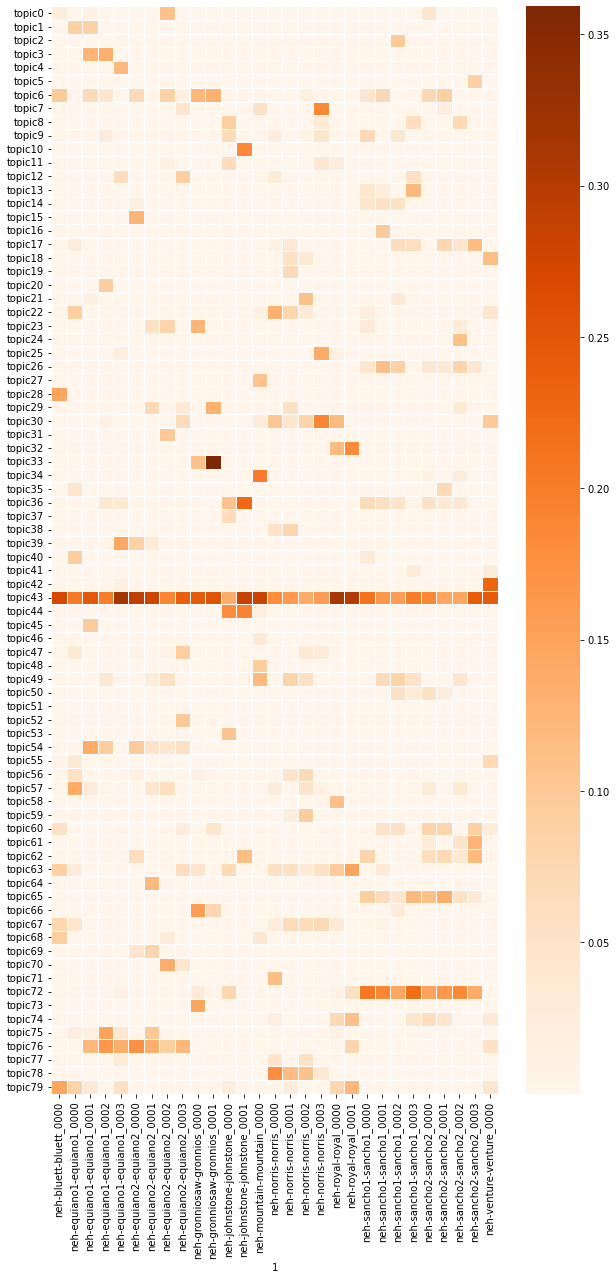

In [59]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 20] 
vis.topic_document(cmap='Oranges')

Comparison of topics:

<AxesSubplot:>

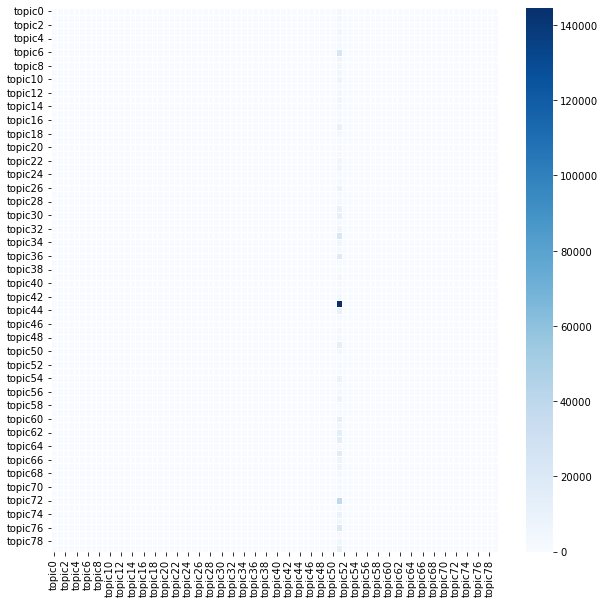

In [50]:
vis.topic_similarities(cbar=True)

Comparison of the frequency of specific words in the distinct topics:

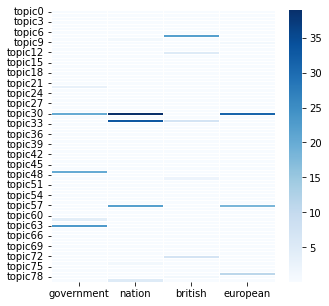

In [51]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [5, 5] 

vis.topic_word(words=["government", "nation", "british", "european"])

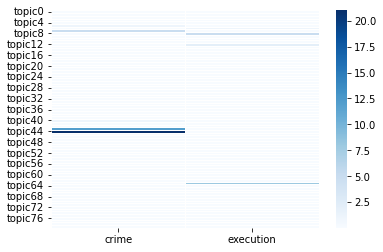

In [52]:
%matplotlib inline

vis.topic_word(words=["crime", "execution"], cbar=True)

Distribution of words within a topic:

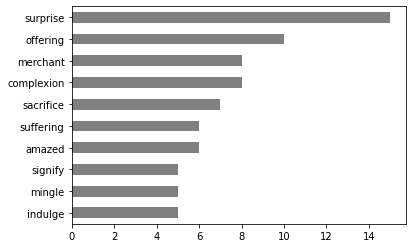

In [53]:
vis.topic("topic1")
plt.rcParams['figure.figsize'] = [10, 10]

Distribution of topics within a given document:

In [ ]:
#vis.document("neh-bluett-bluett_0000")
#plt.rcParams['figure.figsize'] = [30, 50]